In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn import utils  
from sklearn import svm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Data/finalData/first.csv')

In [4]:
df1 = df.drop(['hadm_id','ccs_id'], axis=1)

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45722.0,64.097765,17.131296,15.000,53.0,66.0,78.0,99.000000
gender,45722.0,0.562552,0.496077,0.000,0.0,1.0,1.0,1.000000
los,45722.0,4.625738,6.892732,0.000,1.0,2.0,5.0,261.000000
resp_min,45722.0,10.561538,3.609463,0.170,8.0,11.0,13.0,33.000000
resp_max,45722.0,30.778706,8.384341,12.000,25.0,29.0,35.0,69.000000
resp_mean,45722.0,19.076910,3.506457,8.700,16.6,18.7,21.2,42.700000
glucose_min,45722.0,92.520750,29.962486,0.106,75.0,91.0,107.0,460.000000
glucose_max,45722.0,207.991186,111.774203,21.000,141.0,181.0,240.0,2440.000000
glucose_mean,45722.0,135.777267,36.422146,21.000,113.3,128.6,149.5,661.800000
hr_min,45722.0,64.524576,13.590926,0.350,56.0,64.0,73.0,99.000000


In [5]:
df = pd.read_csv('Data/finalData/twoclassleft.csv')

In [6]:
df.shape

(45569, 27)

In [7]:
df=df.drop(columns=['hadm_id'])
df.head()

,age,gender,los,ccs_id,resp_mean,glucose_min,hr_mean,sysbp_mean,diasbp_mean,temp_mean,...,magnesium,sodium,duration_hours,had_surg,pain,sapsii,sofa,angus,GCS,class
0,35,0,4,50,17,57.0,91,174,93,37.2,...,1.9,140.0,0,0,0,23,2,0,0,0
1,60,1,2,153,16,56.0,80,117,61,36.2,...,2.2,132.0,0,0,0,36,9,0,0,0
2,49,0,5,128,19,106.0,95,141,82,36.5,...,1.6,132.0,2,0,0,27,0,0,1,0
3,74,0,4,145,19,77.0,77,141,67,37.1,...,2.0,139.0,0,1,2,25,1,0,0,0
4,61,1,2,101,24,93.0,69,107,50,36.9,...,1.9,140.0,5,1,0,36,5,0,0,0


gender
0    19943
1    25626
dtype: int64


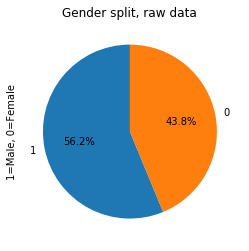

In [8]:
fig = plt.figure(figsize=(4,4))
df.gender.value_counts().plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title('Gender split, raw data')
plt.ylabel('1=Male, 0=Female')
print(df.groupby(['gender']).size())
#fig.savefig('figures/raw_gender.png')

Text(0, 0.5, 'Blue=Male, Yellow=Female')

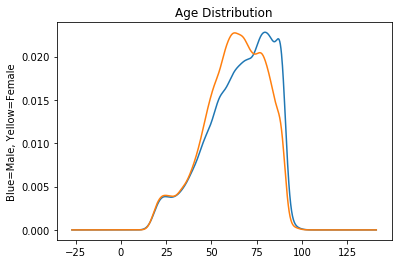

In [9]:
df.groupby('gender').age.plot(kind='kde')
plt.title('Age Distribution')
plt.ylabel('Blue=Male, Yellow=Female')

In [10]:
df.groupby(['class']).size()

class
0    42516
1     3053
dtype: int64

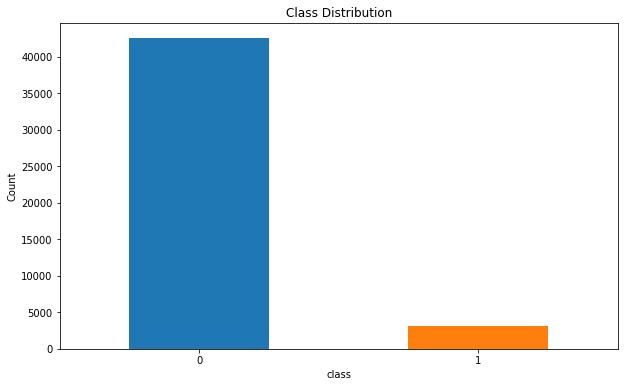

In [11]:
count_classes = pd.value_counts(df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(10,6))
plt.title("Class Distribution")
plt.xlabel("class")
plt.ylabel("Count");

In [12]:
#after dropped outliers
df1 = df.drop(['ccs_id'], axis=1)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45569.0,64.100309,17.135222,15.0,53.0,66.0,78.0,99.0
gender,45569.0,0.562356,0.496102,0.0,0.0,1.0,1.0,1.0
los,45569.0,4.449604,5.965275,0.0,1.0,2.0,5.0,59.0
resp_mean,45569.0,19.063376,3.515762,9.0,17.0,19.0,21.0,43.0
glucose_min,45569.0,92.668040,29.872309,1.0,75.0,91.0,107.0,460.0
hr_mean,45569.0,80.202857,9.755260,23.0,74.0,81.0,88.0,99.0
sysbp_mean,45569.0,119.799623,16.716491,56.0,108.0,118.0,130.0,203.0
diasbp_mean,45569.0,60.424850,11.165563,20.0,53.0,60.0,67.0,155.0
temp_mean,45569.0,36.831600,0.507316,31.1,36.5,36.8,37.2,39.5
sp02,45569.0,96.277535,1.870823,36.0,96.0,97.0,97.0,99.0


In [13]:
Anormal = df[df['class']==1]
#Anormal.shape##(3053,27)
Normal = df[df['class']==0]
#Normal.shape ##(42516,27)
outlier_fraction = len(Anormal)/float(len(Normal))

Text(0.5, 1.0, 'The correlation between angus and urea')

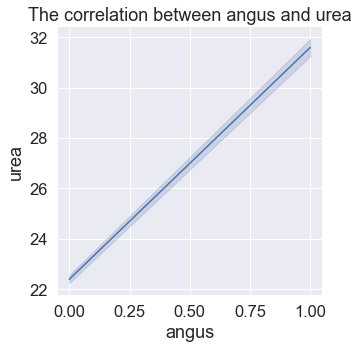

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)

sns.relplot(x="angus", y="urea", kind="line", data=df);
plt.title('The correlation between angus and urea')


Text(0.5, 1.0, 'The correlation between duration_hours and los')

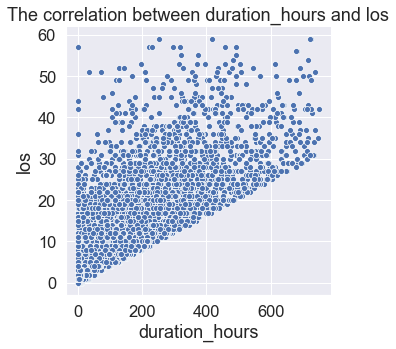

In [15]:
import seaborn as sns
sns.set(font_scale=1.5)

sns.relplot(x="duration_hours", y="los", kind="scatter", data=df1);
plt.title('The correlation between duration_hours and los')

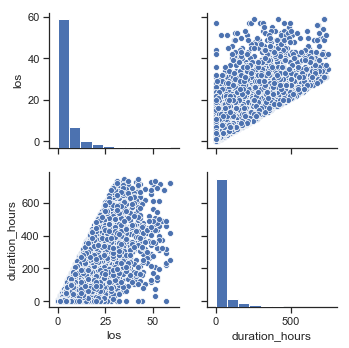

In [16]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

df2 = df1[['los','duration_hours']]
g = sns.pairplot(df2)

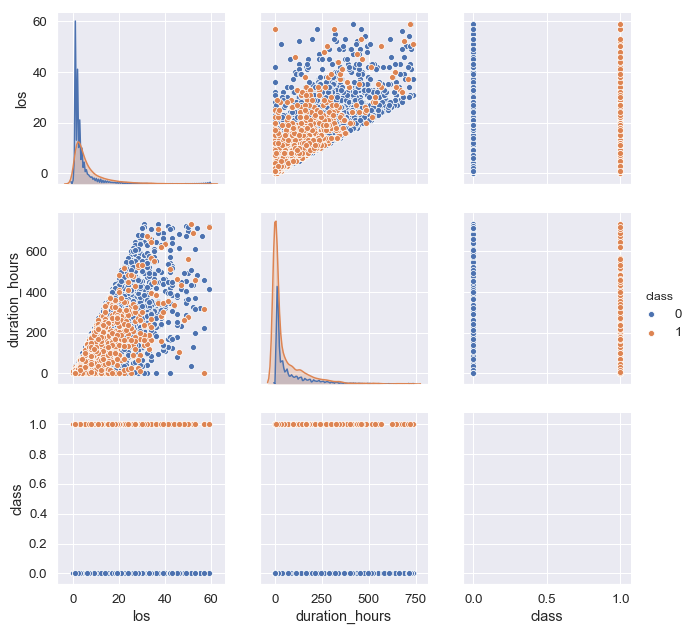

In [17]:
import seaborn as sns; 
df2 = df1[['los','duration_hours','class']]
df2=df2.sample(frac=0.6)
sns.set(font_scale=1.2)
sns.pairplot(df2, hue='class', size=3);


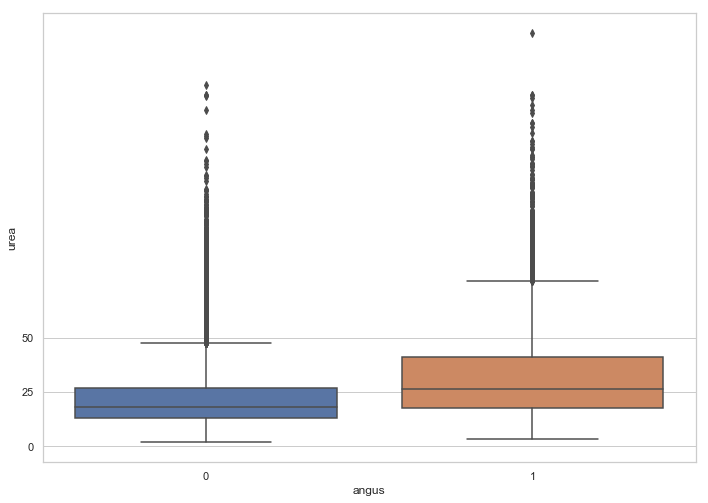

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.yticks([0, 25, 50])
ax = sns.boxplot(x="angus", y="urea", data=df)

Text(0.5, 1.0, 'Angus distribution between delirium and non-delirium admission')

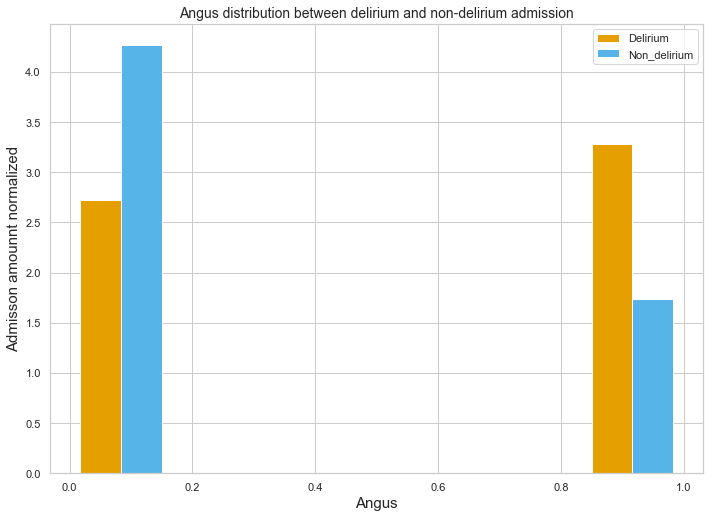

In [19]:

x1=Anormal.angus
x2=Normal.angus
# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Delirium', 'Non_delirium']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2], bins = int(180/30), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Angus', fontsize=15)
plt.ylabel('Admisson amounnt normalized',fontsize=15)
plt.title('Angus distribution between delirium and non-delirium admission',fontsize=14)

In [20]:
Anormal.angus.describe()

count    3053.000000
mean        0.546348
std         0.497929
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: angus, dtype: float64

In [21]:
Normal.angus.describe()

count    42516.00000
mean         0.28895
std          0.45328
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: angus, dtype: float64

In [22]:
Anormal.los.describe()

count    3053.000000
mean        6.998362
std         7.842925
min         0.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        59.000000
Name: los, dtype: float64

In [23]:
Normal.los.describe()

count    42516.000000
mean         4.266582
std          5.764039
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         59.000000
Name: los, dtype: float64

In [24]:
Anormal.duration_hours.describe()#duration_hours-->mechanically ventilated hours 

count    3053.000000
mean       58.772355
std       102.615936
min         0.000000
25%         0.000000
50%        10.000000
75%        76.000000
max       736.000000
Name: duration_hours, dtype: float64

In [25]:
Normal.duration_hours.describe()#duration_hours-->mechanically ventilated hours 

count    42516.000000
mean        32.060965
std         80.389991
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max        749.000000
Name: duration_hours, dtype: float64

In [26]:
print(outlier_fraction)
print("Anormal Cases : {}".format(len(Anormal)))
print("Normal Cases : {}".format(len(Normal)))

0.07180826041960674
Anormal Cases : 3053
Normal Cases : 42516


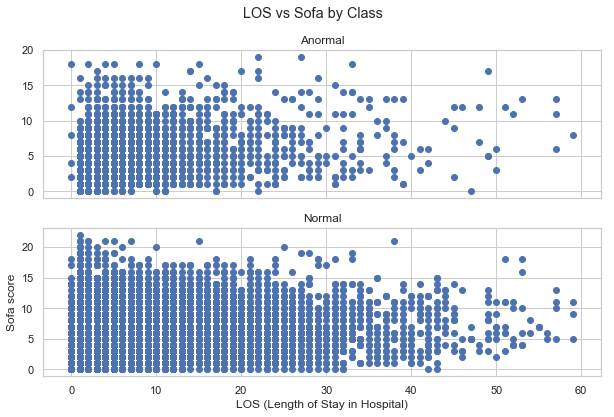

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,6))
f.suptitle('LOS vs Sofa by Class')
ax1.scatter(Anormal.los, Anormal.sofa)
ax1.set_title('Anormal')
ax2.scatter(Normal.los, Normal.sofa)
ax2.set_title('Normal')
plt.xlabel('LOS (Length of Stay in Hospital)')
plt.ylabel('Sofa score')

plt.show()

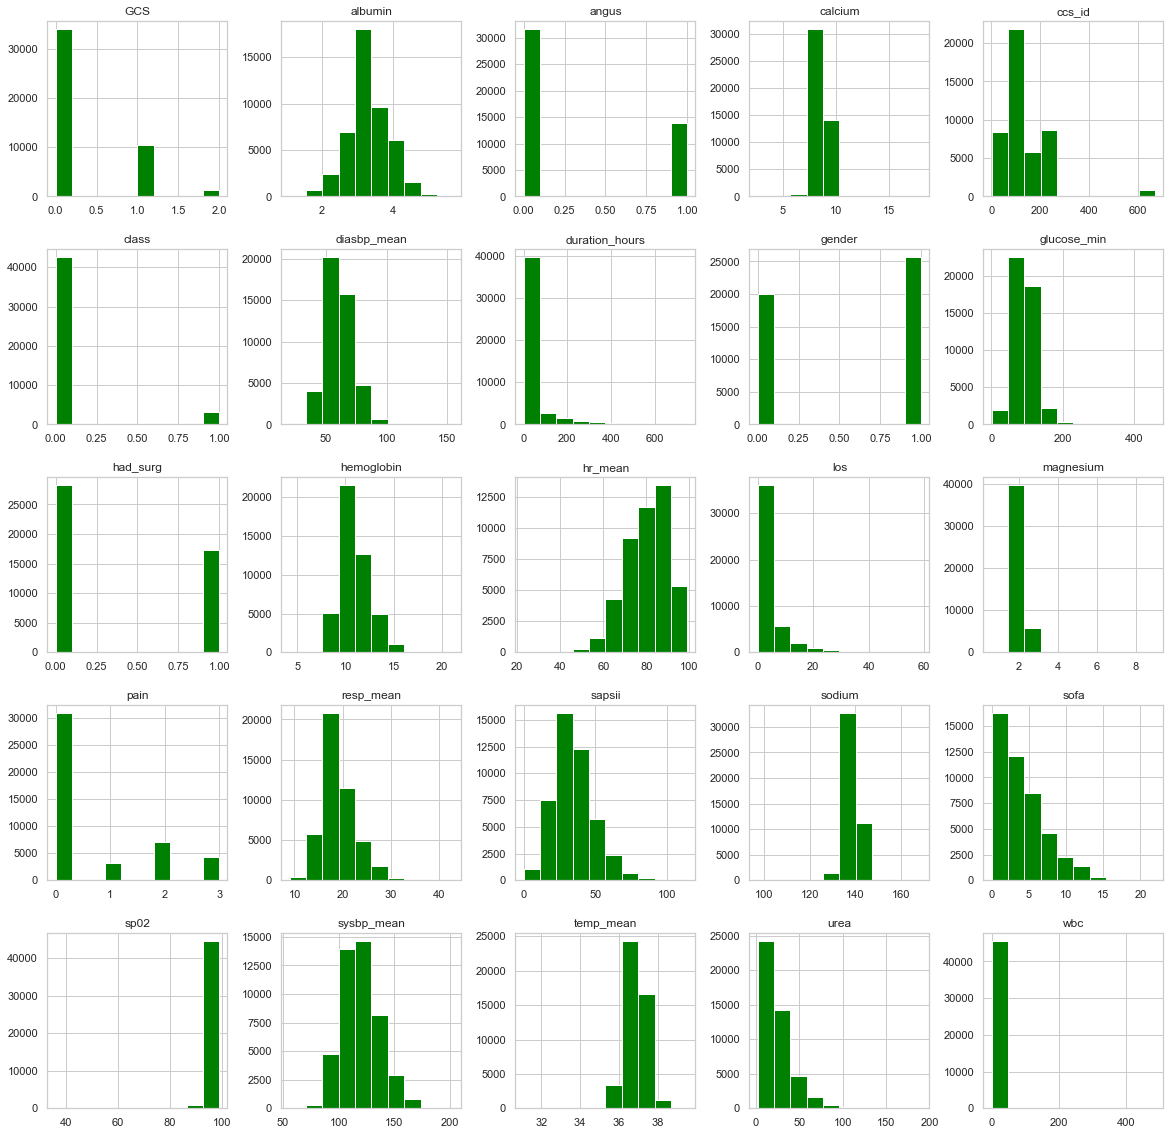

In [28]:
df[df.columns[1:26]].hist(figsize=(20,20),color="green")
plt.show()

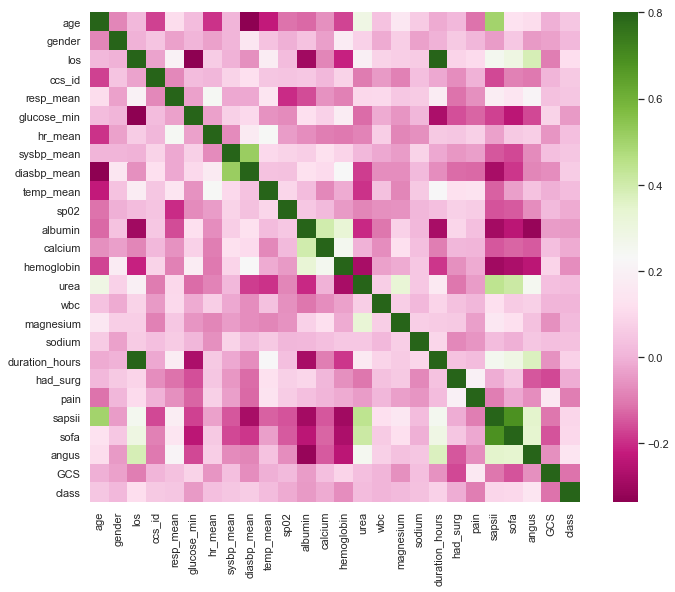

In [29]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True,cmap="PiYG")
plt.show()

In [30]:
print(outlier_fraction)
print("Anormal Cases : {}".format(len(Anormal)))
print("Normal Cases : {}".format(len(Normal)))

0.07180826041960674
Anormal Cases : 3053
Normal Cases : 42516


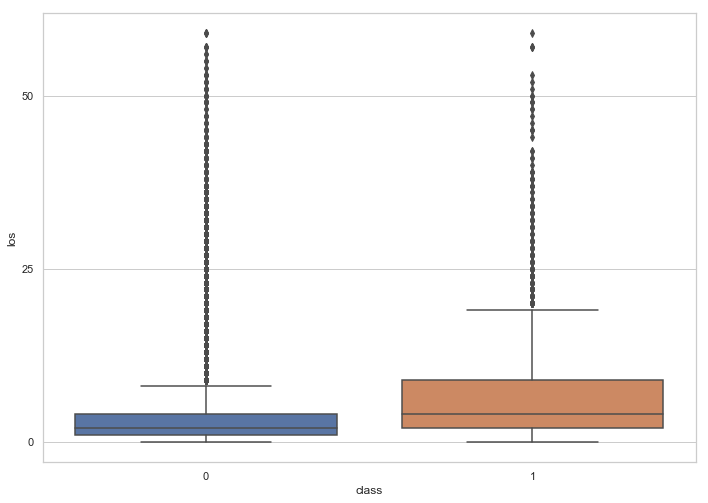

In [31]:
# LOS (Length of stay in hosptial) The cut-off value was set to >60 days
# there was a dilemma between true observations and “outbound fence” 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.yticks([0, 25, 50])
ax = sns.boxplot(x="class", y="los", data=df)

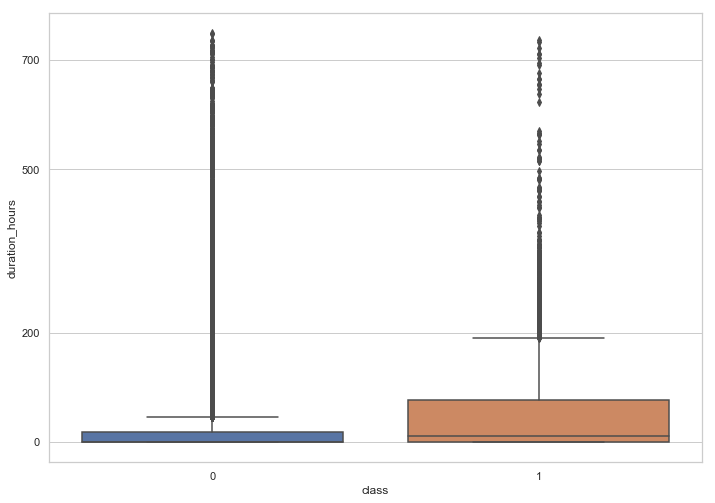

In [32]:
# After removed cut-off value "mechanically ventilated hours" (cut-off >750 hours)
#The max value of raw data was 1813 hours.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.yticks([0,200,500,700])
ax = sns.boxplot(x="class", y="duration_hours", data=df)

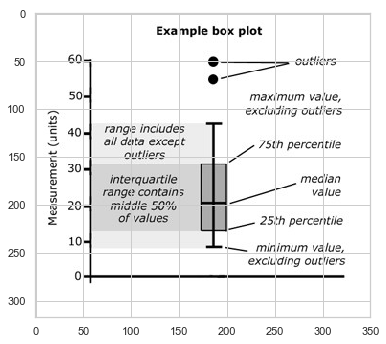

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("img.jpg")
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.show()

In [34]:
Anormal['GCS'].value_counts()

0    2845
1     196
2      12
Name: GCS, dtype: int64

In [35]:
Normal['GCS'].value_counts()

0    31058
1    10231
2     1227
Name: GCS, dtype: int64

In [38]:
Anormal['gender'].value_counts()

1    1782
0    1271
Name: gender, dtype: int64

In [39]:
Normal['gender'].value_counts()

1    23844
0    18672
Name: gender, dtype: int64

In [36]:
Anormal['age'].describe()

count    3053.000000
mean       67.211923
std        16.480616
min        18.000000
25%        56.000000
50%        69.000000
75%        81.000000
max        99.000000
Name: age, dtype: float64

In [37]:
Normal['age'].describe()

count    42516.000000
mean        63.876870
std         17.159756
min         15.000000
25%         53.000000
50%         66.000000
75%         78.000000
max         99.000000
Name: age, dtype: float64

In [35]:
Anormal['sapsii'].describe()

count    3053.000000
mean       39.751065
std        14.232952
min         2.000000
25%        30.000000
50%        38.000000
75%        48.000000
max       101.000000
Name: sapsii, dtype: float64

In [36]:
Normal['sapsii'].describe()

count    42516.000000
mean        34.530718
std         14.061489
min          0.000000
25%         25.000000
50%         33.000000
75%         42.000000
max        114.000000
Name: sapsii, dtype: float64

In [37]:
Anormal['diasbp_mean'].describe()

count    3053.000000
mean       63.093678
std        11.053119
min        31.000000
25%        55.000000
50%        62.000000
75%        70.000000
max       101.000000
Name: diasbp_mean, dtype: float64

In [38]:
Normal['diasbp_mean'].describe()

count    42516.000000
mean        60.233206
std         11.149164
min         20.000000
25%         53.000000
50%         59.000000
75%         67.000000
max        155.000000
Name: diasbp_mean, dtype: float64

In [39]:
Anormal['calcium'].describe()

count    3053.000000
mean        8.495676
std         0.549521
min         6.400000
25%         8.200000
50%         8.500000
75%         8.800000
max        18.100000
Name: calcium, dtype: float64

In [40]:
Normal['calcium'].describe()

count    42516.000000
mean         8.522864
std          0.545501
min          2.600000
25%          8.200000
50%          8.500000
75%          8.900000
max         13.800000
Name: calcium, dtype: float64

In [41]:
Anormal['gender'].describe()

count    3053.000000
mean        0.583688
std         0.493027
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [42]:
Normal['gender'].describe()

count    42516.000000
mean         0.560824
std          0.496292
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [43]:
Anormal['urea'].describe()

count    3053.000000
mean       26.696349
std        17.430858
min         2.700000
25%        14.300000
50%        21.700000
75%        34.100000
max       140.300000
Name: urea, dtype: float64

In [44]:
Normal['urea'].describe()

count    42516.000000
mean        25.099744
std         16.695608
min          2.000000
25%         13.900000
50%         19.800000
75%         31.100000
max        190.100000
Name: urea, dtype: float64

In [45]:
Normal['ccs_id'].describe()

count    42516.000000
mean       130.815058
std         95.785821
min          1.000000
25%         97.000000
50%        109.000000
75%        153.000000
max        670.000000
Name: ccs_id, dtype: float64

In [46]:
Anormal['ccs_id'].describe()

count    3053.00000
mean      154.34982
std       140.15836
min         1.00000
25%        96.00000
50%       122.00000
75%       228.00000
max       663.00000
Name: ccs_id, dtype: float64

In [47]:
Normal['ccs_id'].describe()

count    42516.000000
mean       130.815058
std         95.785821
min          1.000000
25%         97.000000
50%        109.000000
75%        153.000000
max        670.000000
Name: ccs_id, dtype: float64